In [1]:
# **** DONT NEED TO MERGE THIS CELL*****


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import datetime 

In [2]:
# Import monthly demand data, source: https://www.eia.gov/realtime_grid/#/summary/demand?end=20170301&start=20170201&regions=0
demand_data = pd.read_csv('CISO demand data 2016 2017.csv')

# Convert dates into more usable format and sort
demand_data=demand_data.rename(columns={'Month':'Date'})
pd.plotting.register_matplotlib_converters()
demand_data['Date'] = pd.to_datetime(demand_data['Date'])
demand_data.sort_values(by=['Date']).head()

# Split out month and year
demand_data['MONTH'] = demand_data['Date'].dt.month
demand_data['Year'] = demand_data['Date'].dt.year
demand_data.head()

,Date,CISO demand megawatthours,CAL demand megawatthours,MONTH,Year
0,2017-12-01,18379575,22420992,12,2017
1,2017-11-01,17352790,21123360,11,2017
2,2017-10-01,19103643,23413973,10,2017
3,2017-09-01,20861520,25758002,9,2017
4,2017-08-01,23558109,29200284,8,2017


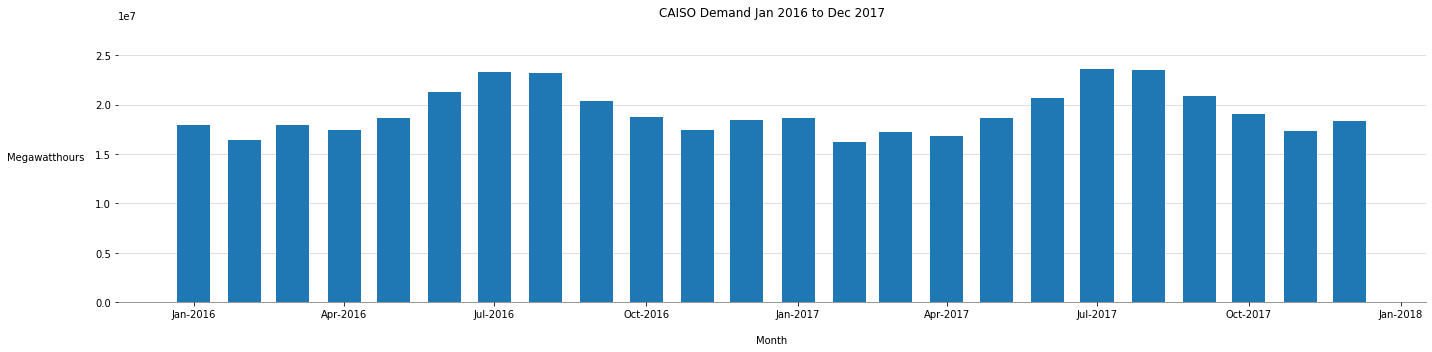

In [3]:
# Test plot bar chart for total demand  
fig,ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(20) 
y_axis = demand_data['CISO demand megawatthours'] 
x_axis = demand_data['Date'] 
plt.bar(x_axis,y_axis,width=20,align='center') 
plt.ylim(0,max(y_axis)*1.2)  # *****************set xlim to remove extra month
plt.title("CAISO Demand Jan 2016 to Dec 2017")
plt.xlabel ("\nMonth")
plt.ylabel ("Megawatthours  ",rotation='0',ha='right')
plt.tight_layout()

# Adjust for better data viz
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_alpha(.5)
plt.grid(axis='y',alpha=.5)
ax.set_axisbelow(True)
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y')) #change label frequnecy?

#plt.savefid(path/name.format)     #if needed
#plt.legend                        #probably won't need but not sure what it will look like yet

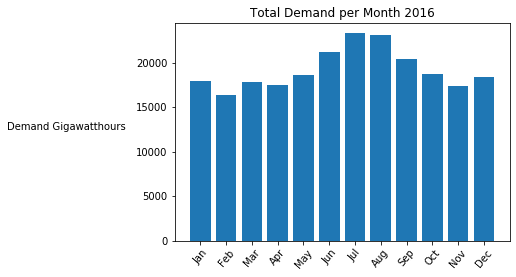

In [4]:
# Prepare data for demand vs renewables production by month 2016 table by conforming demand data
all_source_yr_mon_group=demand_data.groupby(['Year','MONTH'])
monthly_sum_demand = pd.DataFrame(all_source_yr_mon_group['CISO demand megawatthours'].sum())
monthly_sum_demand['Demand Gigawatthours'] = (monthly_sum_demand['CISO demand megawatthours'] / 1000)
data_16_demand = monthly_sum_demand.loc[2016].reset_index()
data_16_demand['MONTH'] = data_16_demand['MONTH'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

# Plot total demand by in 2016
plt.bar(data_16_demand['MONTH'],data_16_demand['Demand Gigawatthours'])
plt.xticks(rotation=50)
plt.title('Total Demand per Month 2016')
plt.ylabel("Demand Gigawatthours  ",rotation='0',ha='right')
plt.show()

Text(0, 0.5, 'Megawatthours  ')

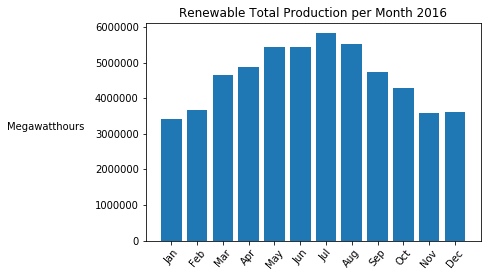

In [5]:
# **** DONT NEED TO MERGE THIS CEEL *****


full_data = pd.read_csv('all_breakdown.csv')
full_data['SOLAR'] = full_data['SOLAR'].fillna(0)
full_data['SOLAR PV'] = full_data['SOLAR PV'].fillna(0)
full_data['SOLAR THERMAL'] = full_data['SOLAR THERMAL'].fillna(0)
full_data['SOLAR TOTAL'] = full_data['SOLAR']+full_data['SOLAR PV']+full_data['SOLAR THERMAL']
full_data['TIMESTAMP'] = pd.to_datetime(full_data['TIMESTAMP'])
full_data['MONTH'] = full_data['TIMESTAMP'].dt.month
full_data['YEAR'] = full_data['TIMESTAMP'].dt.year
full_data['DAY'] = full_data['TIMESTAMP'].dt.day
full_data['WIND SOLAR'] = full_data['SOLAR TOTAL'] + full_data['WIND TOTAL']
full_data['RENEW TOTAL'] = full_data['BIOGAS'] + full_data['BIOMASS']+ full_data['GEOTHERMAL']+full_data['GEOTHERMAL']+full_data['WIND SOLAR']
YearMonthGrouped = full_data.groupby(['YEAR','MONTH'])
monthly_sum = pd.DataFrame(YearMonthGrouped['RENEW TOTAL'].sum())
monthly_sum['Solar Total'] = YearMonthGrouped['SOLAR TOTAL'].sum()
monthly_sum['Wind Total'] = YearMonthGrouped['WIND TOTAL'].sum()
monthly_sum['Wind Solar Total'] = YearMonthGrouped['WIND SOLAR'].sum()
data_16 = monthly_sum.loc[2016].reset_index()
data_16['MONTH'] = data_16['MONTH'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
plt.bar(data_16['MONTH'],data_16['RENEW TOTAL'])
plt.xticks(rotation=50)
plt.title('Renewable Total Production per Month 2016')
plt.ylabel("Megawatthours  ",rotation='0',ha='right')

In [6]:
# Prepare data for demand vs renewables production by month 2016 table by merging datasets
merged_df = pd.merge(data_16, data_16_demand, on="MONTH")

#Show renewables at Gigawatt scale
merged_df['Renew Gigawatthours'] = (merged_df['RENEW TOTAL'] / 1000)

# Get percent renewables
merged_df['Percent Renew'] = (merged_df['Renew Gigawatthours'] / merged_df['Demand Gigawatthours'] *100).map('{:.0f}%'.format)
merged_df.head()

,MONTH,RENEW TOTAL,Solar Total,Wind Total,Wind Solar Total,CISO demand megawatthours,Demand Gigawatthours,Renew Gigawatthours,Percent Renew
0,Jan,3413971.0,829948.0,724652.0,1554600.0,17934580,17934.580,3413.971,19%
1,Feb,3661808.0,1366327.0,559124.0,1925451.0,16408995,16408.995,3661.808,22%
2,Mar,4648914.0,1491268.0,1346410.0,2837678.0,17893864,17893.864,4648.914,26%
3,Apr,4879733.0,1762602.0,1387542.0,3150144.0,17468662,17468.662,4879.733,28%
4,May,5449757.0,2127094.0,1617675.0,3744769.0,18616178,18616.178,5449.757,29%


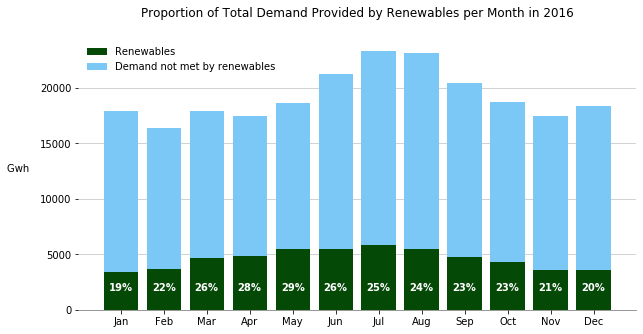

In [7]:
# Plot demand vs renewables production by month 2016 chart
fig,ax = plt.subplots()
renew_16 = merged_df['Renew Gigawatthours']
fig.set_figheight(5)
fig.set_figwidth(10)
p1 = plt.bar(merged_df['MONTH'],renew_16,width=.8,color='xkcd:darkgreen',label='Renewables') 

# Show total demand less renewables produced
p2 = plt.bar(merged_df['MONTH'],(merged_df['Demand Gigawatthours']-renew_16),
             bottom=renew_16,width=.8,color='xkcd:lightblue',label='Demand not met by renewables') 

# Label bars with % renewable concentration
bar_label = merged_df['Percent Renew']
def autolabel(rects):
    for idx,rect in enumerate(p1):
        height = 1500
        ax.text(rect.get_x() + rect.get_width()/2., height, (bar_label[idx]),ha='center',va='bottom',color='w',weight='bold')
autolabel (p1)

# Plot design
plt.title('Proportion of Total Demand Provided by Renewables per Month in 2016\n')
plt.ylabel("Gwh  ",rotation='0',ha='right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_alpha(.5)
plt.grid(axis='y',alpha=.7)
ax.set_axisbelow(True) 
plt.legend(frameon=False)
plt.show()

In [8]:
# Prepare to plot demand vs renewables production by month 2017 chart

# Prepare renewables df
data_17 = monthly_sum.loc[2017].reset_index()
data_17['MONTH'] = data_17['MONTH'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

# Prepare demand df
data_17_demand = monthly_sum_demand.loc[2017].reset_index()
data_17_demand['MONTH'] = data_17_demand['MONTH'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

# Merge 2017 datasets
merged_df_17 = pd.merge(data_17, data_17_demand, on="MONTH")

#Show renewables at Gigawatt scale
merged_df_17['Renew Gigawatthours'] = merged_df_17['RENEW TOTAL'] / 1000

# Include percent renewables
merged_df_17['Percent Renew'] = (merged_df_17['Renew Gigawatthours'] / 
                                 merged_df_17['Demand Gigawatthours'] *100).map('{:.0f}%'.format)
merged_df_17.head()

,MONTH,RENEW TOTAL,Solar Total,Wind Total,Wind Solar Total,CISO demand megawatthours,Demand Gigawatthours,Renew Gigawatthours,Percent Renew
0,Jan,3689110.0,1159206.0,774702.0,1933908.0,18655025,18655.025,3689.110,20%
1,Feb,3577596.0,1252732.0,853201.0,2105933.0,16198625,16198.625,3577.596,22%
2,Mar,4711820.0,2090784.0,1026009.0,3116793.0,17267702,17267.702,4711.820,27%
3,Apr,5288764.0,2358916.0,1373562.0,3732478.0,16780115,16780.115,5288.764,32%
4,May,6048185.0,2756799.0,1608416.0,4365215.0,18630197,18630.197,6048.185,32%


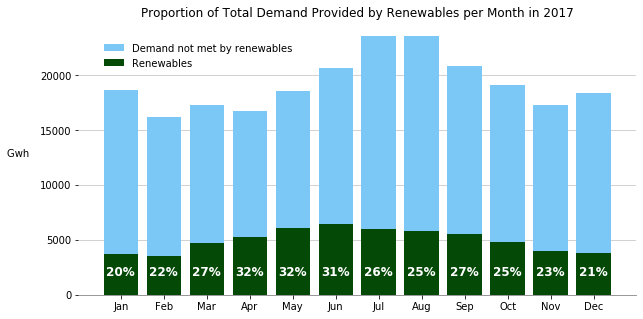

In [9]:
# Plot demand vs renewables production by month 2017 chart
fig,ax = plt.subplots()
renew_17 = merged_df_17['Renew Gigawatthours']
fig.set_figheight(5) 
fig.set_figwidth(10)

# Plot renewables
p1 = plt.bar(merged_df_17['MONTH'],renew_17,width=.8,color='xkcd:darkgreen',label='Renewables') 

# Plot total demand less renewables 
p2 = plt.bar(merged_df_17['MONTH'],(merged_df_17['Demand Gigawatthours']-renew_17),
             bottom=renew_17,width=.8,color='xkcd:lightblue',label='Demand not met by renewables') 
    #color consistent with other charts for total demand

# Label bars with % renewable 
bar_label = merged_df_17['Percent Renew']
def autolabel(rects):
    for idx,rect in enumerate(p1):
        height = 1500
        ax.text(rect.get_x() + rect.get_width()/2., height, (bar_label[idx]),
                ha='center',va='bottom',color='w',weight='bold',fontsize='12')
autolabel (p1)

# Chart design
plt.title('Proportion of Total Demand Provided by Renewables per Month in 2017')
plt.ylabel("Gwh  ",rotation='0',ha='right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_alpha(.5)
plt.grid(axis='y',alpha=.7)
ax.set_axisbelow(True) 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],frameon=False,bbox_to_anchor=(.4,.8))
# ax.legend(handles[::-1], labels[::-1],bbox_to_anchor=(1,.2), borderaxespad=0,frameon=False) # ax.legend(prop=dict(size=18))
plt.show()

In [10]:
# Pull 2017 peak load data - source: http://www.caiso.com/Documents/CaliforniaISOPeakLoadHistory.pdf
peak_data = pd.read_csv('CISO demand data 9.1.17 peak load.csv')

# Prepare data for merge
peak_data=peak_data.rename(columns={'Category':'Date'})
pd.plotting.register_matplotlib_converters()
peak_data['TIMESTAMP'] = pd.to_datetime(peak_data['Date'])
peak_data.sort_values(by=['TIMESTAMP']).head()
peak_data['Hour'] = peak_data['TIMESTAMP'].dt.hour+1
peak_data = peak_data.astype({"Hour": float})

# Merge data
merged_peak = pd.merge(peak_data, full_data, on="TIMESTAMP")
merged_peak.head(2)

C:\Users\Scottinsacto\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


,Date,CISO demand megawatthours,CISO demand forecast megawatthours,TIMESTAMP,Hour_x,BIOGAS,BIOMASS,GEOTHERMAL,Hour_y,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL,SOLAR TOTAL,MONTH,YEAR,DAY,WIND SOLAR,RENEW TOTAL
0,09/1/2017 23H PDT,39648,39266,2017-09-01 23:00:00,24.0,164.0,357.0,1173.0,24.0,370.0,0.0,0.0,0.0,526.0,0.0,9,2017,1,526.0,3393.0
1,09/1/2017 22H PDT,43346,42947,2017-09-01 22:00:00,23.0,164.0,370.0,1173.0,23.0,399.0,0.0,0.0,0.0,516.0,0.0,9,2017,1,516.0,3396.0


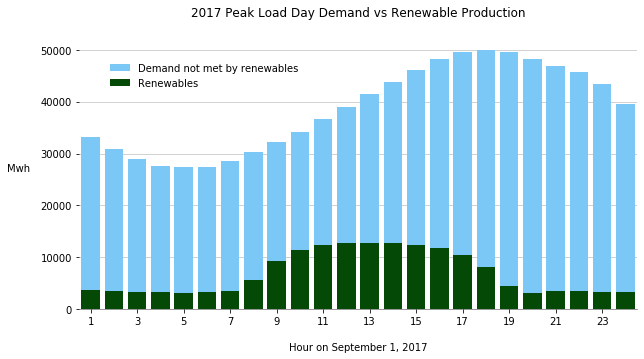

In [11]:
# Plot demand vs renewables production by month 2017 chart
fig,ax = plt.subplots()
peak_day = merged_peak['RENEW TOTAL']
fig.set_figheight(5)
fig.set_figwidth(10)

# Plot renwables
p1 = plt.bar(merged_peak['Hour_x'],peak_day,width=.8,color='xkcd:darkgreen',label='Renewables') 

# Plot total demand less renewables produced
p2 = plt.bar(merged_peak['Hour_x'],(merged_peak['CISO demand megawatthours']-peak_day),
             bottom=peak_day,width=.8,color='xkcd:lightblue',label='Demand not met by renewables') 

# Chart design
plt.title('# Plot demand vs renewables production by month 2017 chart
fig,ax = plt.subplots()
renew_17 = merged_df_17['Renew Gigawatthours']
fig.set_figheight(5) 
fig.set_figwidth(10)

# Plot renewables
p1 = plt.bar(merged_df_17['MONTH'],renew_17,width=.8,color='xkcd:darkgreen',label='Renewables') 

# Plot total demand less renewables 
p2 = plt.bar(merged_df_17['MONTH'],(merged_df_17['Demand Gigawatthours']-renew_17),
             bottom=renew_17,width=.8,color='xkcd:lightblue',label='Demand not met by renewables') 
    #color consistent with other charts for total demand

# Label bars with % renewable 
bar_label = merged_df_17['Percent Renew']
def autolabel(rects):
    for idx,rect in enumerate(p1):
        height = 1500
        ax.text(rect.get_x() + rect.get_width()/2., height, (bar_label[idx]),
                ha='center',va='bottom',color='w',weight='bold',fontsize='12')
autolabel (p1)

# Chart design
plt.title('Proportion of Total Demand Provided by Renewables per Month in 2017')
plt.ylabel("Gwh  ",rotation='0',ha='right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_alpha(.5)
plt.grid(axis='y',alpha=.7)
ax.set_axisbelow(True) 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],frameon=False,bbox_to_anchor=(.4,.8))
# ax.legend(handles[::-1], labels[::-1],bbox_to_anchor=(1,.2), borderaxespad=0,frameon=False) # ax.legend(prop=dict(size=18))
plt.show()\n')
plt.ylabel("Mwh  ",rotation='0',ha='right')
plt.xlabel('\nHour on September 1, 2017')
plt.xlim(min(merged_peak['Hour_x']-.5),max(merged_peak['Hour_x'])+.5)
plt.xticks(np.arange(min(merged_peak['Hour_x']),max(merged_peak['Hour_x']),2))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_alpha(.5)
plt.grid(axis='y',alpha=.7)
ax.set_axisbelow(True) 
handles, labels = ax.get_legend_handles_labels()
color_list=['xkcd:lightblue','xkcd:darkgreen']
ax.legend(handles[::-1], labels[::-1],bbox_to_anchor=(.4,.92), borderaxespad=0,frameon=False) # ax.legend(prop=dict(size=18))
# for i in range(len(legend.get_texts())):
#     plt.setp(legend.get_texts()[i],color=color_list[i])
plt.show()